# Visualizing Time Series Data in Python - Part 3

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

## Datasets

### CO2 Levels

In [6]:
co2_levels_datasets = pd.read_csv('../datasets/time series/co2_levels.csv')

### Airline Passengers

In [27]:
airline_datasets = pd.read_csv('../datasets/time series/airline_passengers.csv', parse_dates=['Month'], index_col='Month')

## Seasonality, Trend and Noise
You will go beyond summary statistics by learning about autocorrelation and partial autocorrelation plots. You will also learn how to automatically detect seasonality, trend and noise in your time series data.

### Autocorrelation in time series data
In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of `order 3` returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The `plot_acf()` function in the `statsmodels` library can be used to measure and plot the autocorrelation of a time series.

In [7]:
co2_levels = co2_levels_datasets.copy()
co2_levels['datestamp'] = pd.to_datetime(co2_levels['datestamp'])
co2_levels = co2_levels.set_index('datestamp')
co2_levels = co2_levels.fillna(method='bfill')

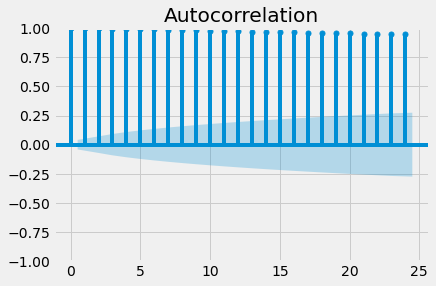

In [8]:
plt.style.use('fivethirtyeight')

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

### Interpret autocorrelation plots
If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the `plot_acf()` function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

In the autocorrelation plot above, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?

### Answer
They are highly correlated but not statistically significant.

### Partial autocorrelation in time series data
Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of `order 3` returns the correlation between our time series (`t_1`, `t_2`, `t_3`, …) and its own values lagged by 3 time points (`t_4`, `t_5`, `t_6`, …), but only after removing all effects attributable to lags 1 and 2.

The `plot_pacf()` function in the `statsmodels` library can be used to measure and plot the partial autocorrelation of a time series.

/Users/lukasz/opt/anaconda3/envs/data-camp-new/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


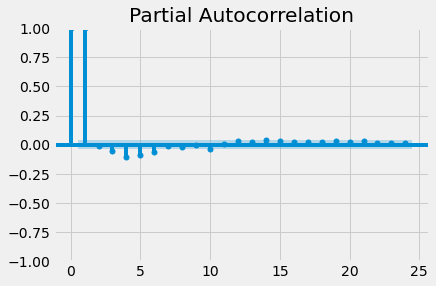

In [9]:
# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

### Interpret partial autocorrelation plots
If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The `.plot_pacf()` function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

In the partial autocorrelation plot above, at which lag values do we have statistically significant partial autocorrelations?

### Answer
0 and 1

### Time series decomposition
When visualizing time series data, you should look out for some distinguishable patterns:

- **seasonality:** *does the data display a clear periodic pattern?*
- **trend:** *does the data follow a consistent upwards or downward slope?*
- **noise:** *are there any outlier points or missing values that are not consistent with the rest of the data?*

You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The `statsmodels` library provides the `seasonal_decompose()` function to perform time series decomposition out of the box.

`decomposition = sm.tsa.seasonal_decompose(time_series)`

You can extract a specific component, for example seasonality, by accessing the `seasonal` attribute of the decomposition object.

In [11]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


### Plot individual components
It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, `resid`) components.

```
observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid
```

You can then use the extracted components and plot them individually.

The `decomposition` object you created in the last exercise is available in your workspace.

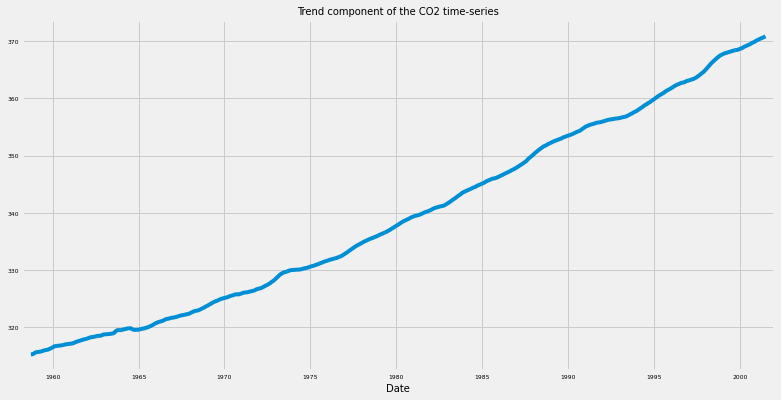

In [16]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Trend component of the CO2 time-series', fontsize=10)
plt.show()

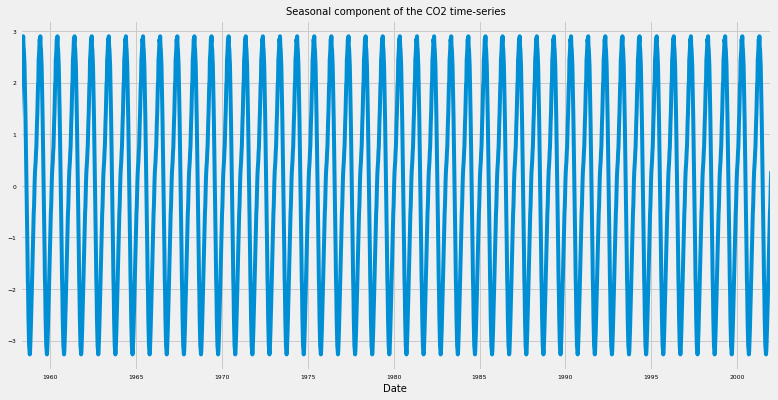

In [17]:
# Extract the trend component
seasonal = decomposition.seasonal

# Plot the values of the trend
ax = seasonal.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component of the CO2 time-series', fontsize=10)
plt.show()

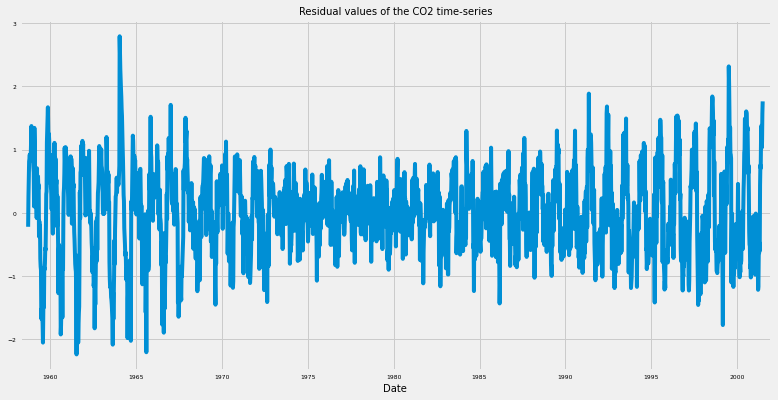

In [18]:
# Extract the residual values
residuals = decomposition.resid

# Plot the values of the trend
ax = residuals.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Residual values of the CO2 time-series', fontsize=10)
plt.show()

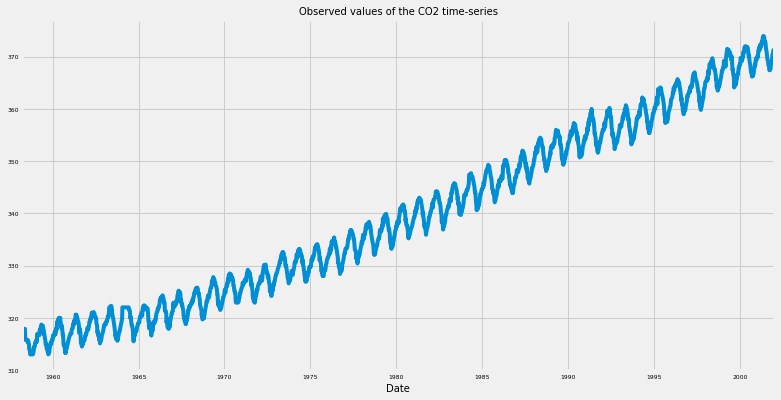

In [19]:
# Extract the residual values
observed = decomposition.observed

# Plot the values of the trend
ax = observed.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Observed values of the CO2 time-series', fontsize=10)
plt.show()

### Visualize the airline dataset
You will now review the contents of chapter 1. You will have the opportunity to work with a new dataset that contains the monthly number of passengers who took a commercial flight between January 1949 and December 1960.

We have printed the first 5 and the last 5 rows of the `airline` DataFrame for you to review.

In [28]:
airline = airline_datasets.copy()

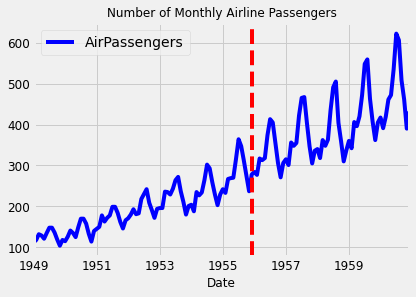

In [30]:
# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

### Analyze the airline dataset
In Chapter 2 you learned:
- How to check for the presence of missing values, and how to collect summary statistics of time series data contained in a `pandas` DataFrame.
- To generate boxplots of your data to quickly gain insight in your data.
- Display *aggregate* statistics of your data using `groupby()`.

In this exercise, you will apply all these concepts on the `airline` DataFrame.

In [31]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


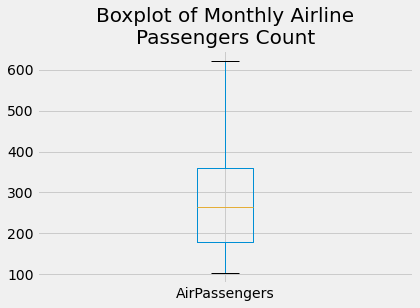

In [32]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

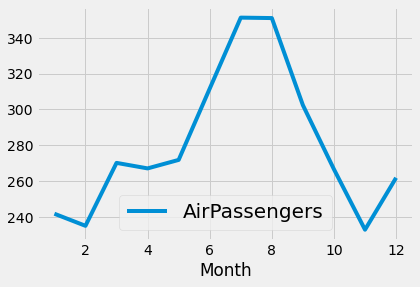

In [33]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

### Time series decomposition of the airline dataset
In this exercise, you will apply time series decomposition to the `airline` dataset, and visualize the `trend` and `seasonal` components.

In [34]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


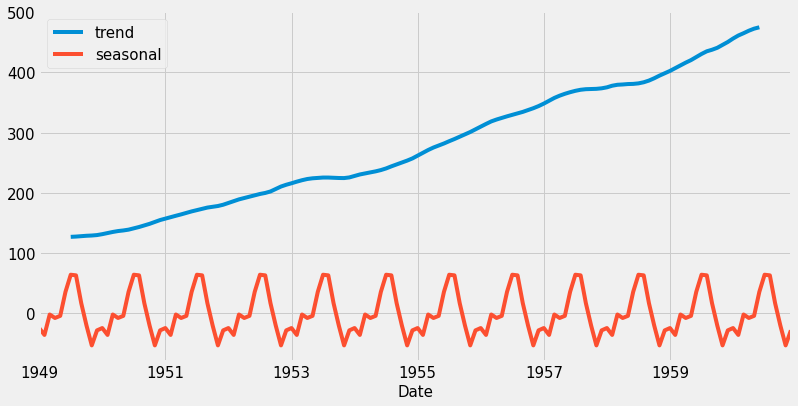

In [40]:
airline_decomposed = pd.concat([trend, seasonal], axis=1)

# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head(5))

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()